In [1]:
import pandas as pd
import numpy as np
import os
from plotnine import *

In [2]:
def plot_performances(df, metric_name = "IDWE", threshold = -1e6, figsize = (7,7)):
    df.loc[df[metric_name] < threshold, metric_name] = threshold
    df = df.melt(id_vars = metric_name)
    
    categorical_hyperparams = df.loc[df["value"].apply(lambda x: isinstance(x, str)), "variable"].unique()
    df["is_categorical"] = df["variable"].isin(categorical_hyperparams)
    line_df = df[~df["is_categorical"]]
    line_df.loc[:, "value"] = line_df["value"].astype(float)

    # Create plot with different geoms
    plot = (
        ggplot(df, aes(x="value", y=metric_name)) +
        facet_wrap("~ variable", scales="free_x") +
        geom_bar(
            aes(fill = "factor(value)"), stat="summary", fun_y=np.mean, 
            position="dodge", data=df[df["is_categorical"]], show_legend = False
        ) +  # Bar plot for categorical
        geom_line(
            aes(x = "value", group="variable", color = "variable"), data=line_df
        ) +  # Line plot for numerical
        labs(color="Hyperparameter Value", x="Hyperparameter Value", y="Performance", 
             title=f"Performance ({metric_name}) across Hyperparameters") +
        theme(figure_size = figsize)
    )
    return plot

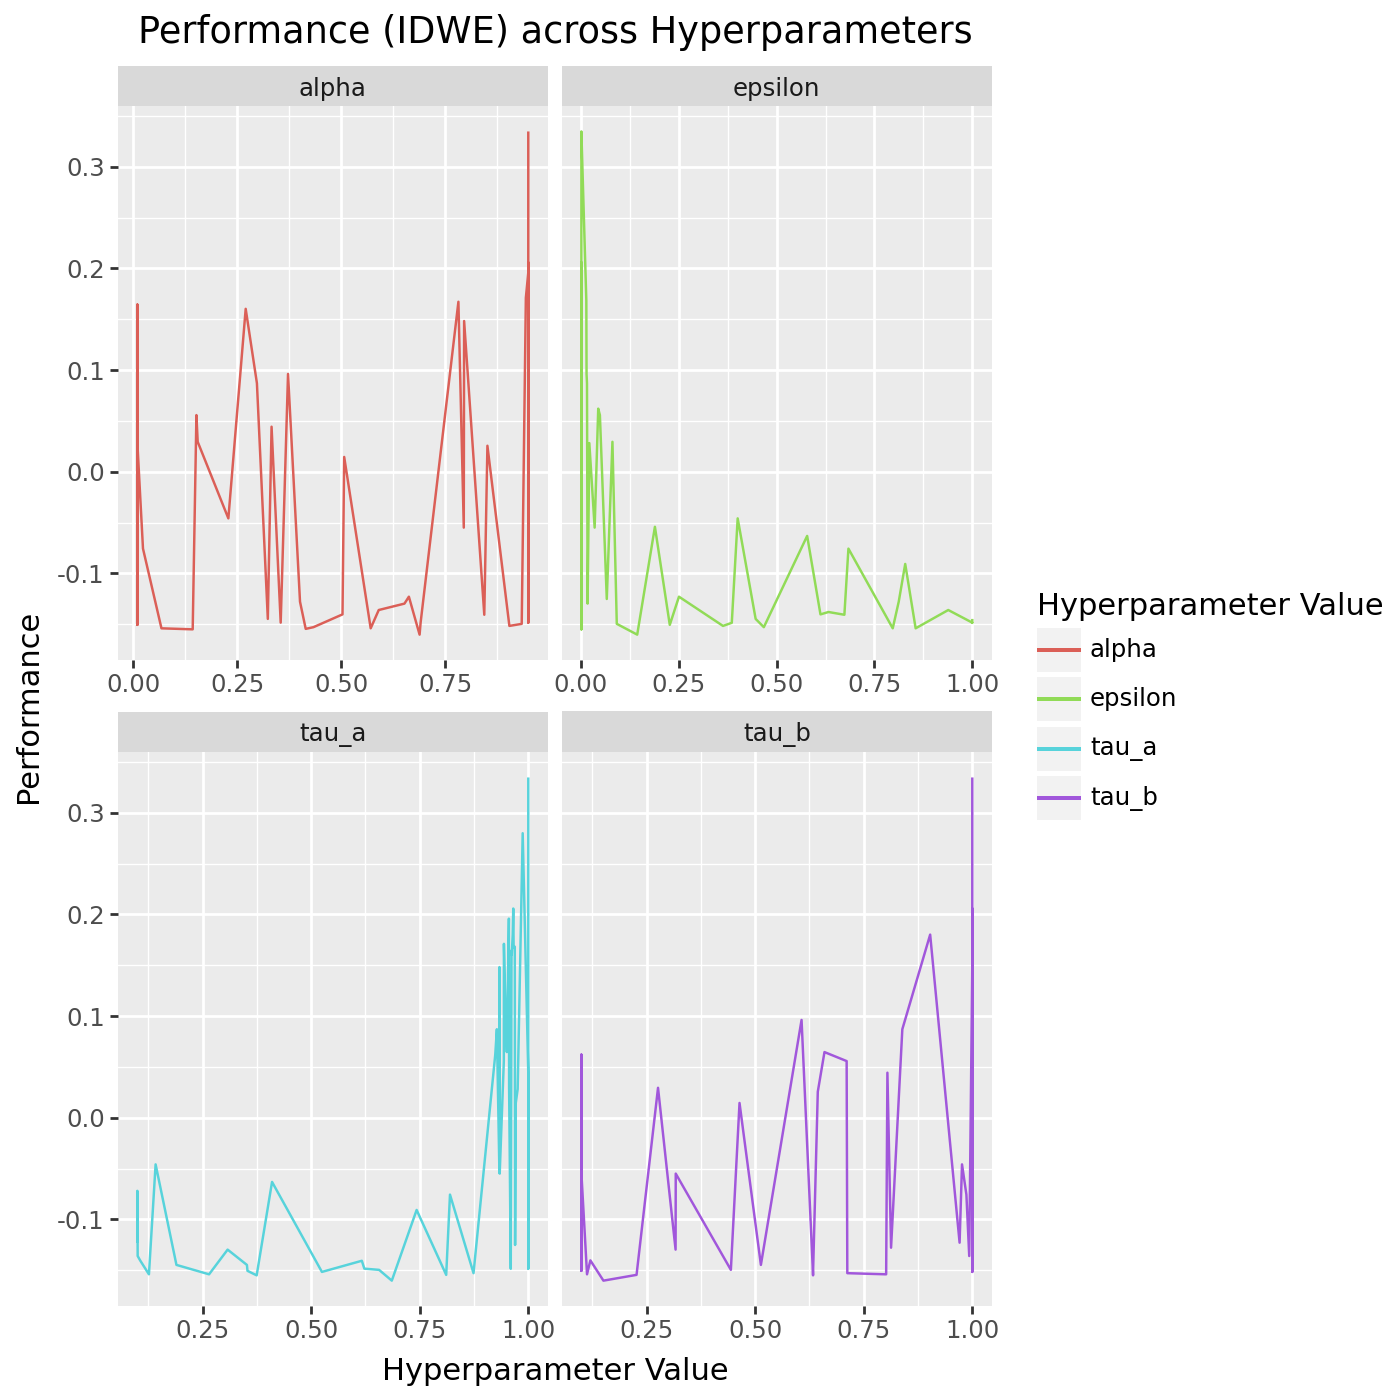

In [65]:
path = "/p/project1/hai_fzj_bda/koenig8/ot/tune_params/fused_problem/idwe_scores.csv"
df1 = pd.read_csv(path)
plot_performances(df1)

## Search where i accidentally minimized the R2

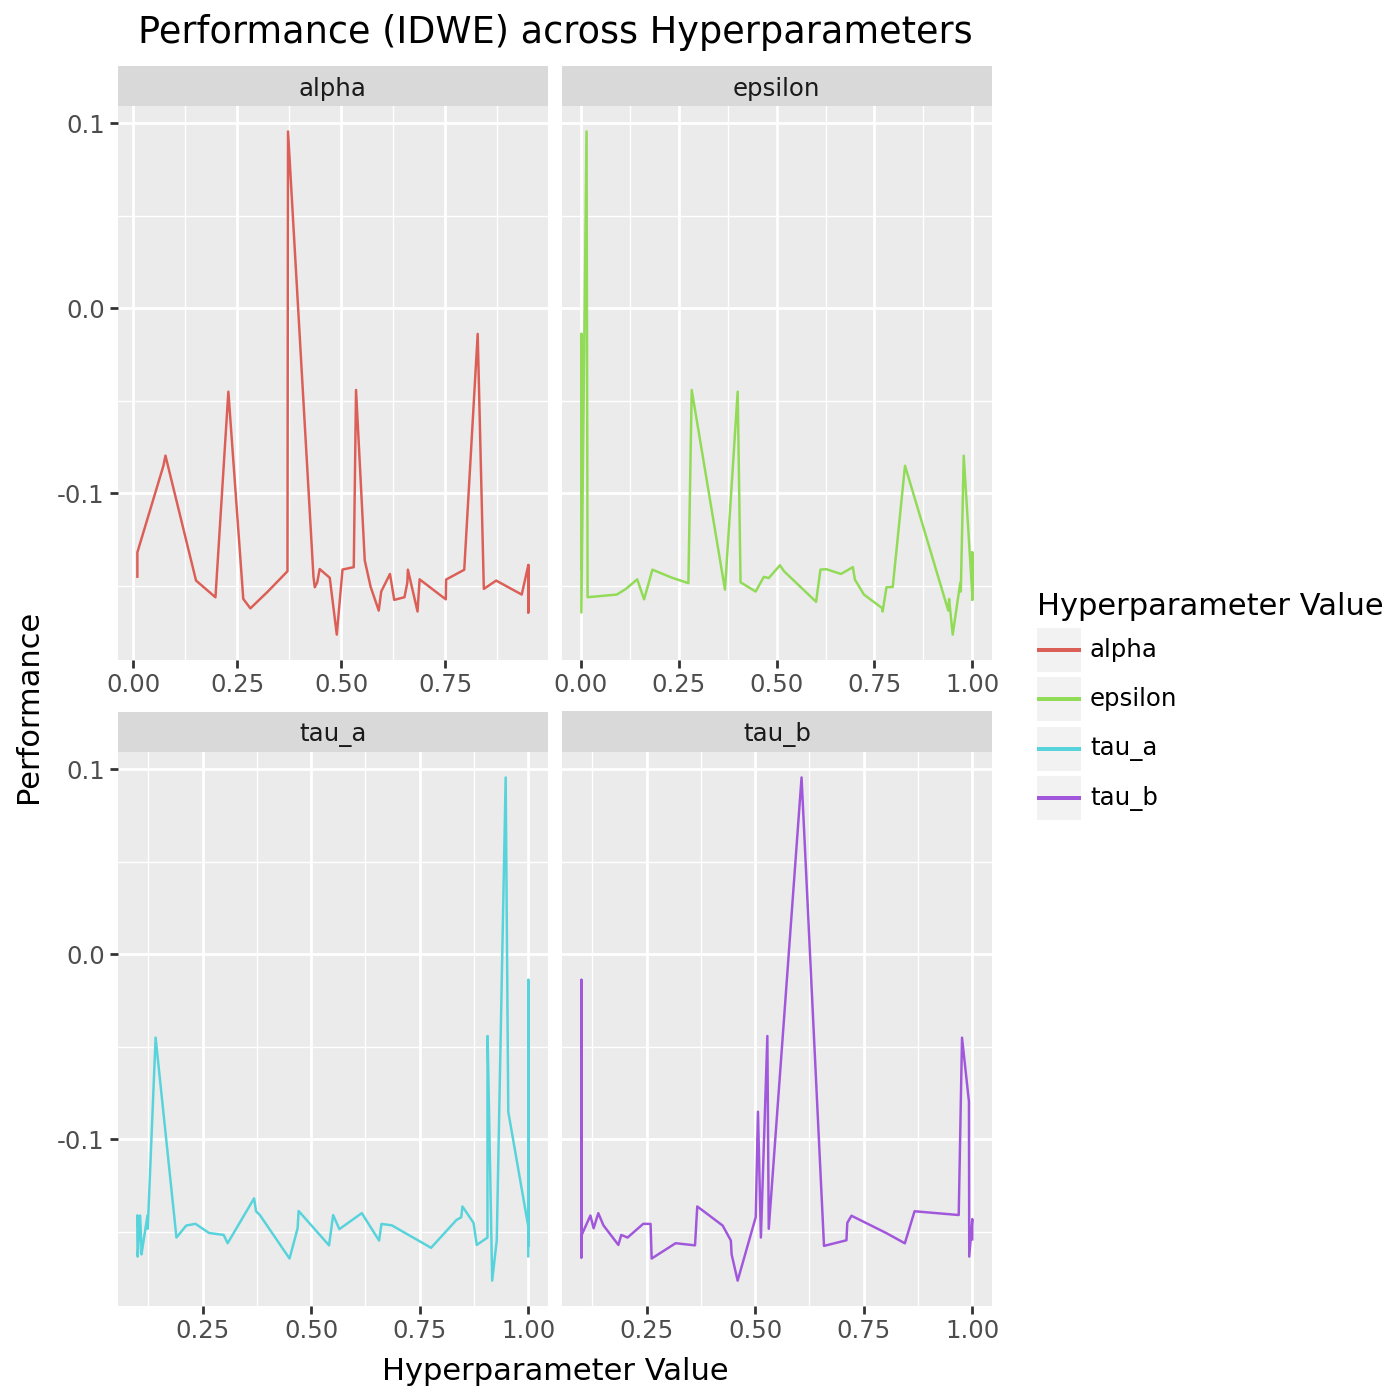

In [66]:
path = "/p/project1/hai_fzj_bda/koenig8/ot/tune_params/fused_problem/old_search.csv"
df1 = pd.read_csv(path)
plot_performances(df1)

## Search with multiple possible source/target metrices

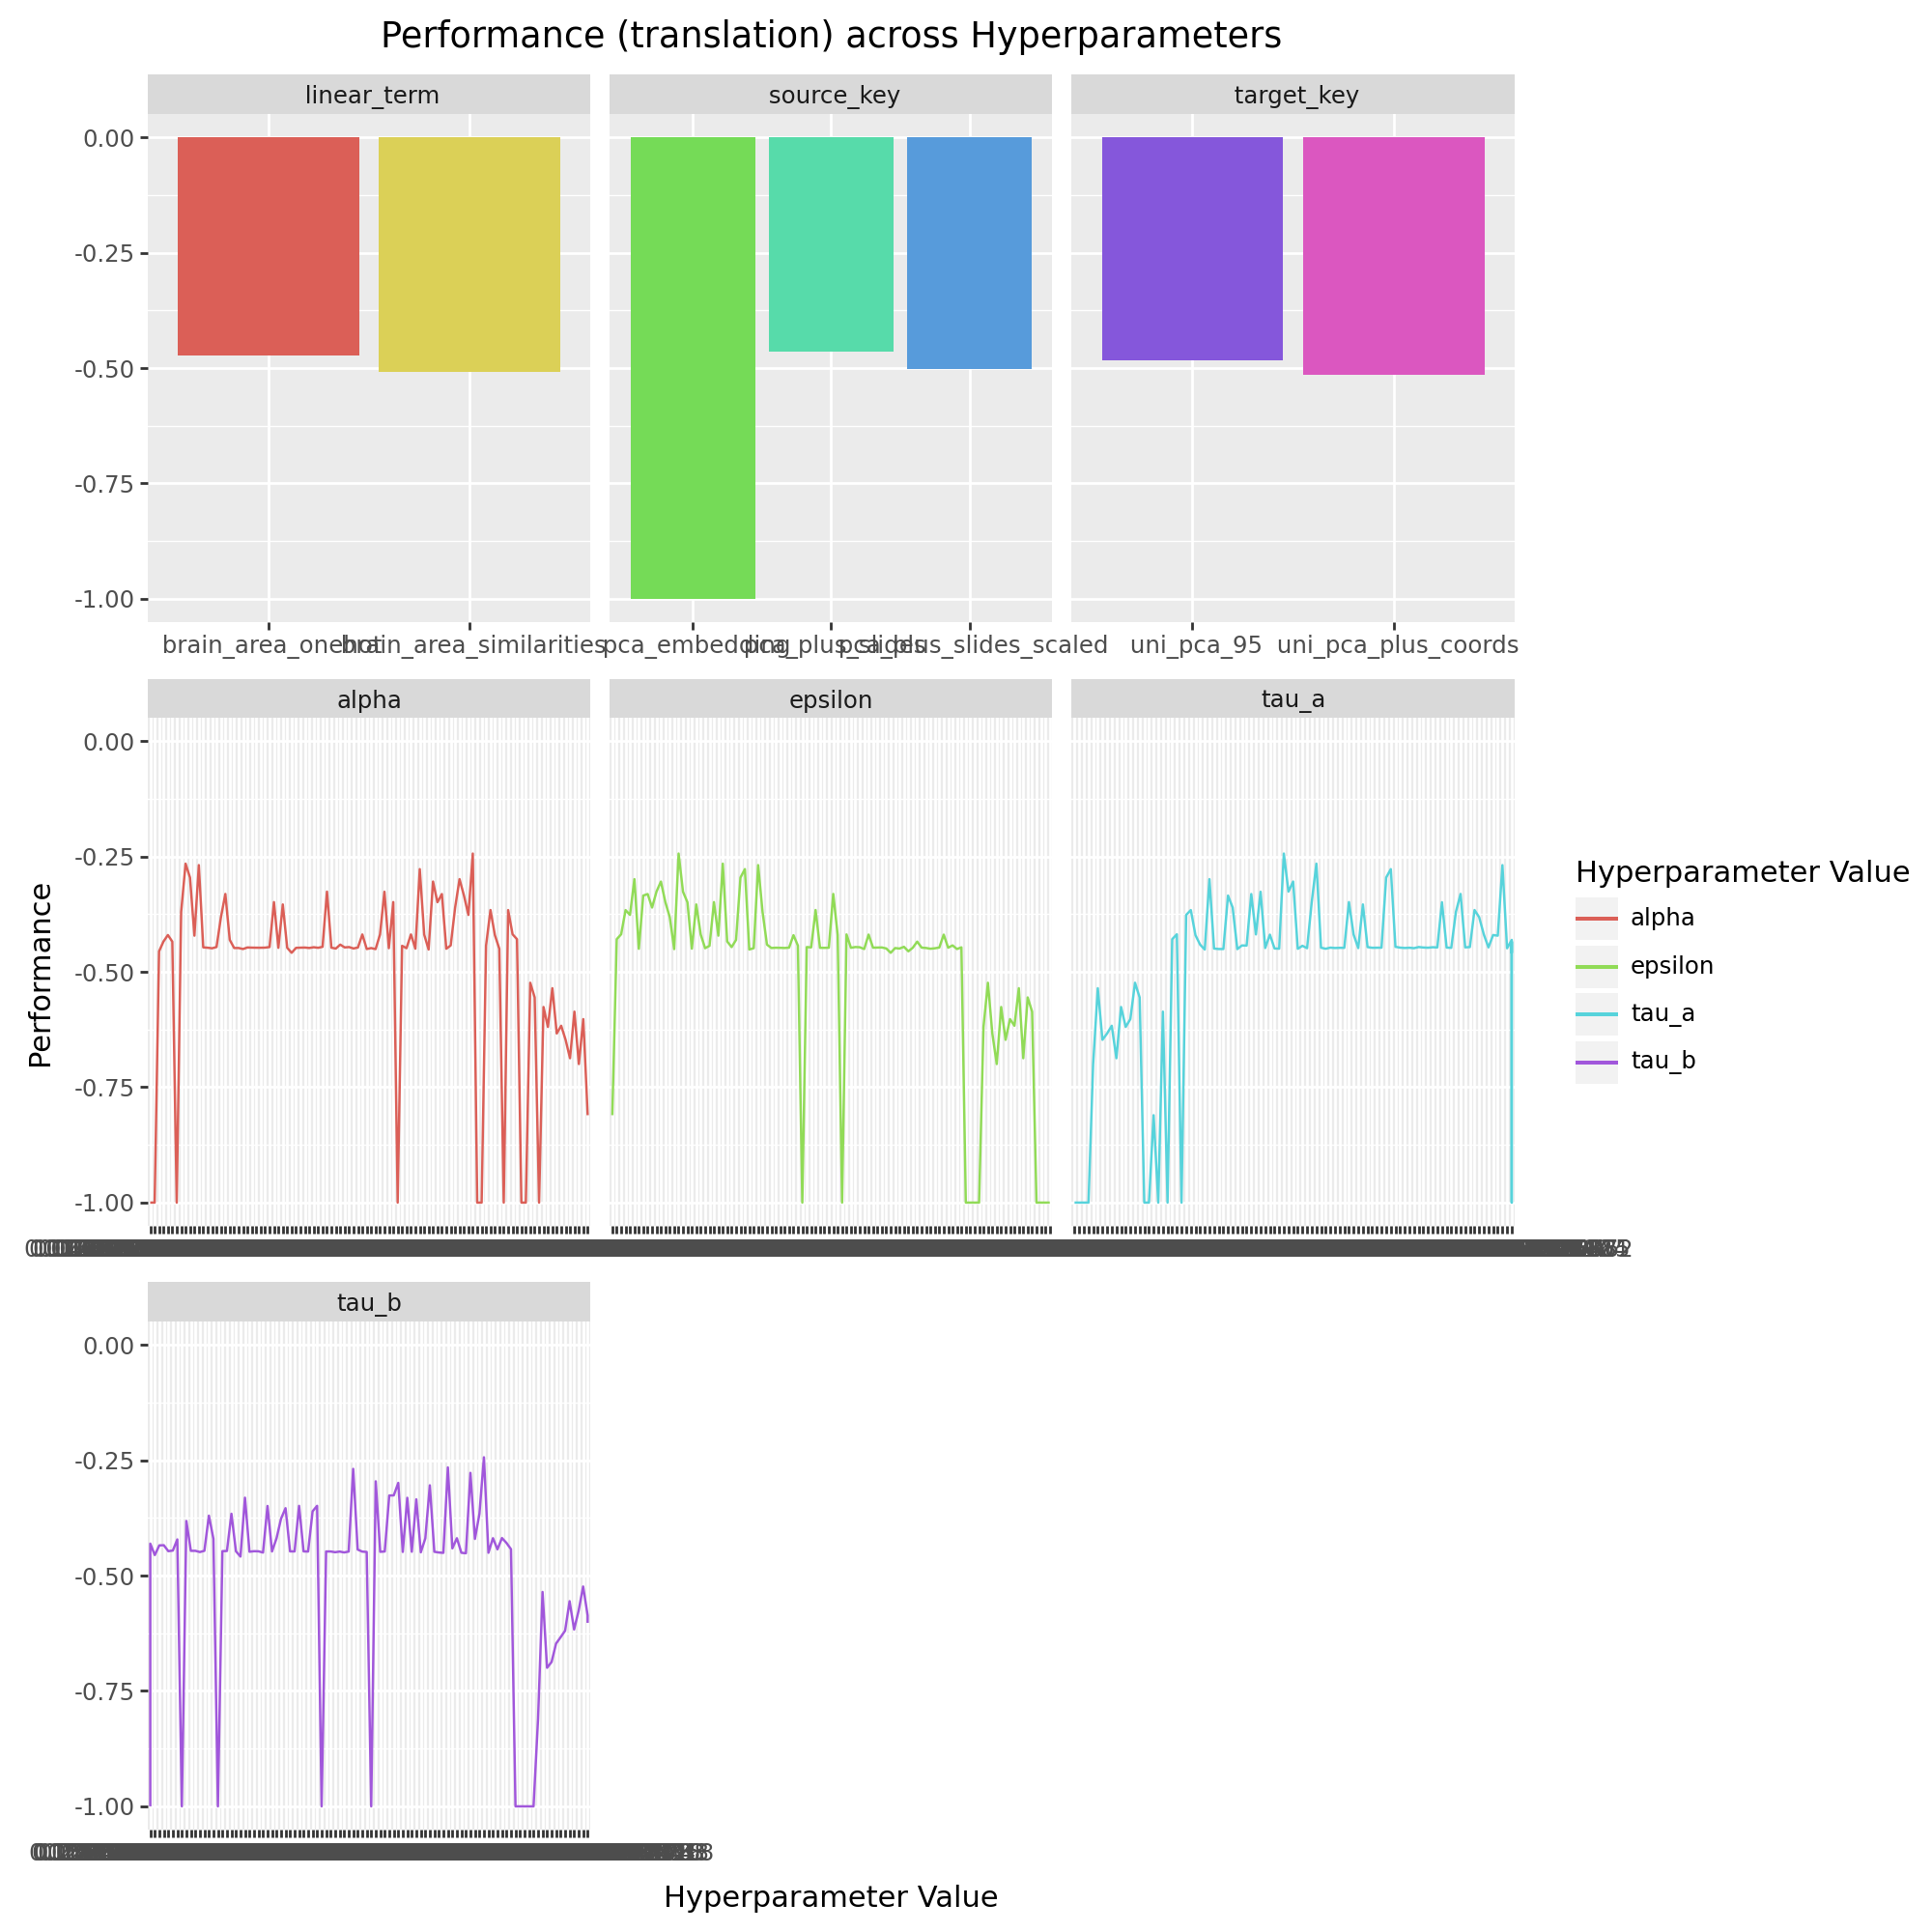

In [38]:
path = "/p/project1/hai_fzj_bda/koenig8/ot/tune_params/scaled_problem/param_search.csv"
df2 = pd.read_csv(path)
plot_performances(df2, metric_name = "translation", figsize = (10, 10), threshold = -1)

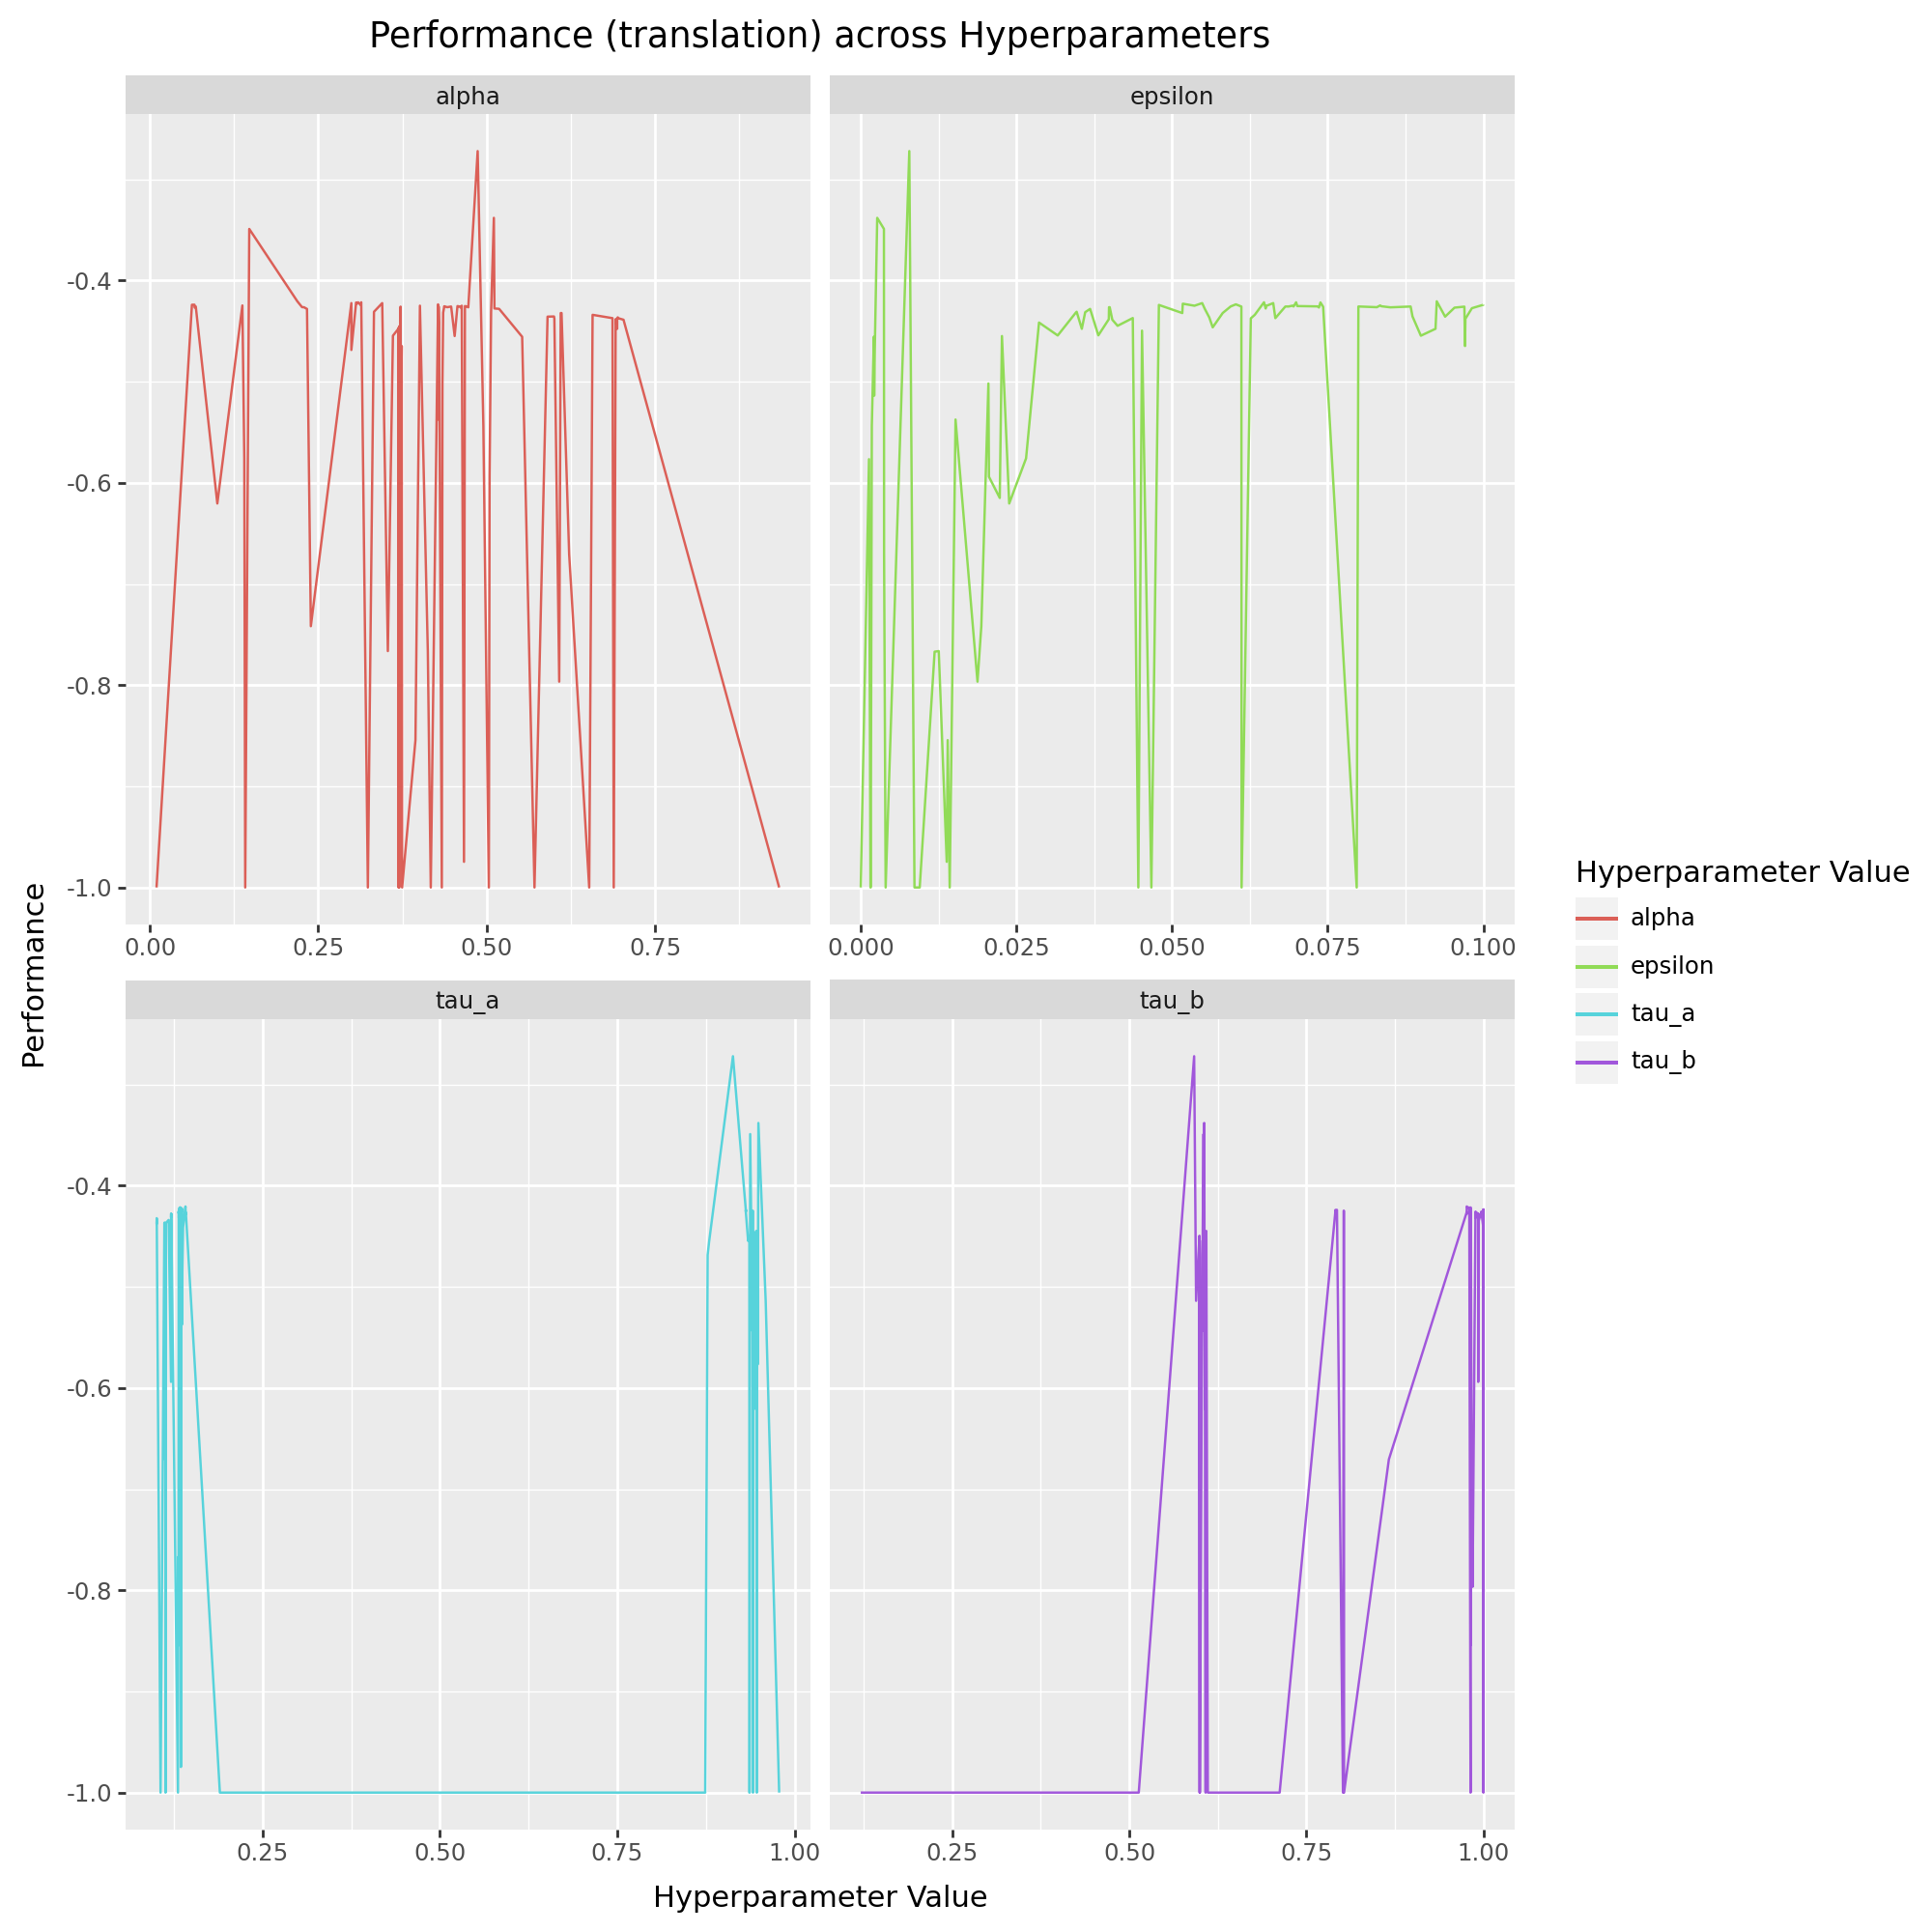

In [37]:
path = "/p/project1/hai_fzj_bda/koenig8/ot/tune_params/only_scaled/param_search.txt"
df3 = pd.read_csv(path).drop([" linear_term", " source_key", " target_key"], axis=1)
plot_performances(df3, metric_name = "translation", figsize = (10, 10), threshold = -1)

## Imbalanced ot

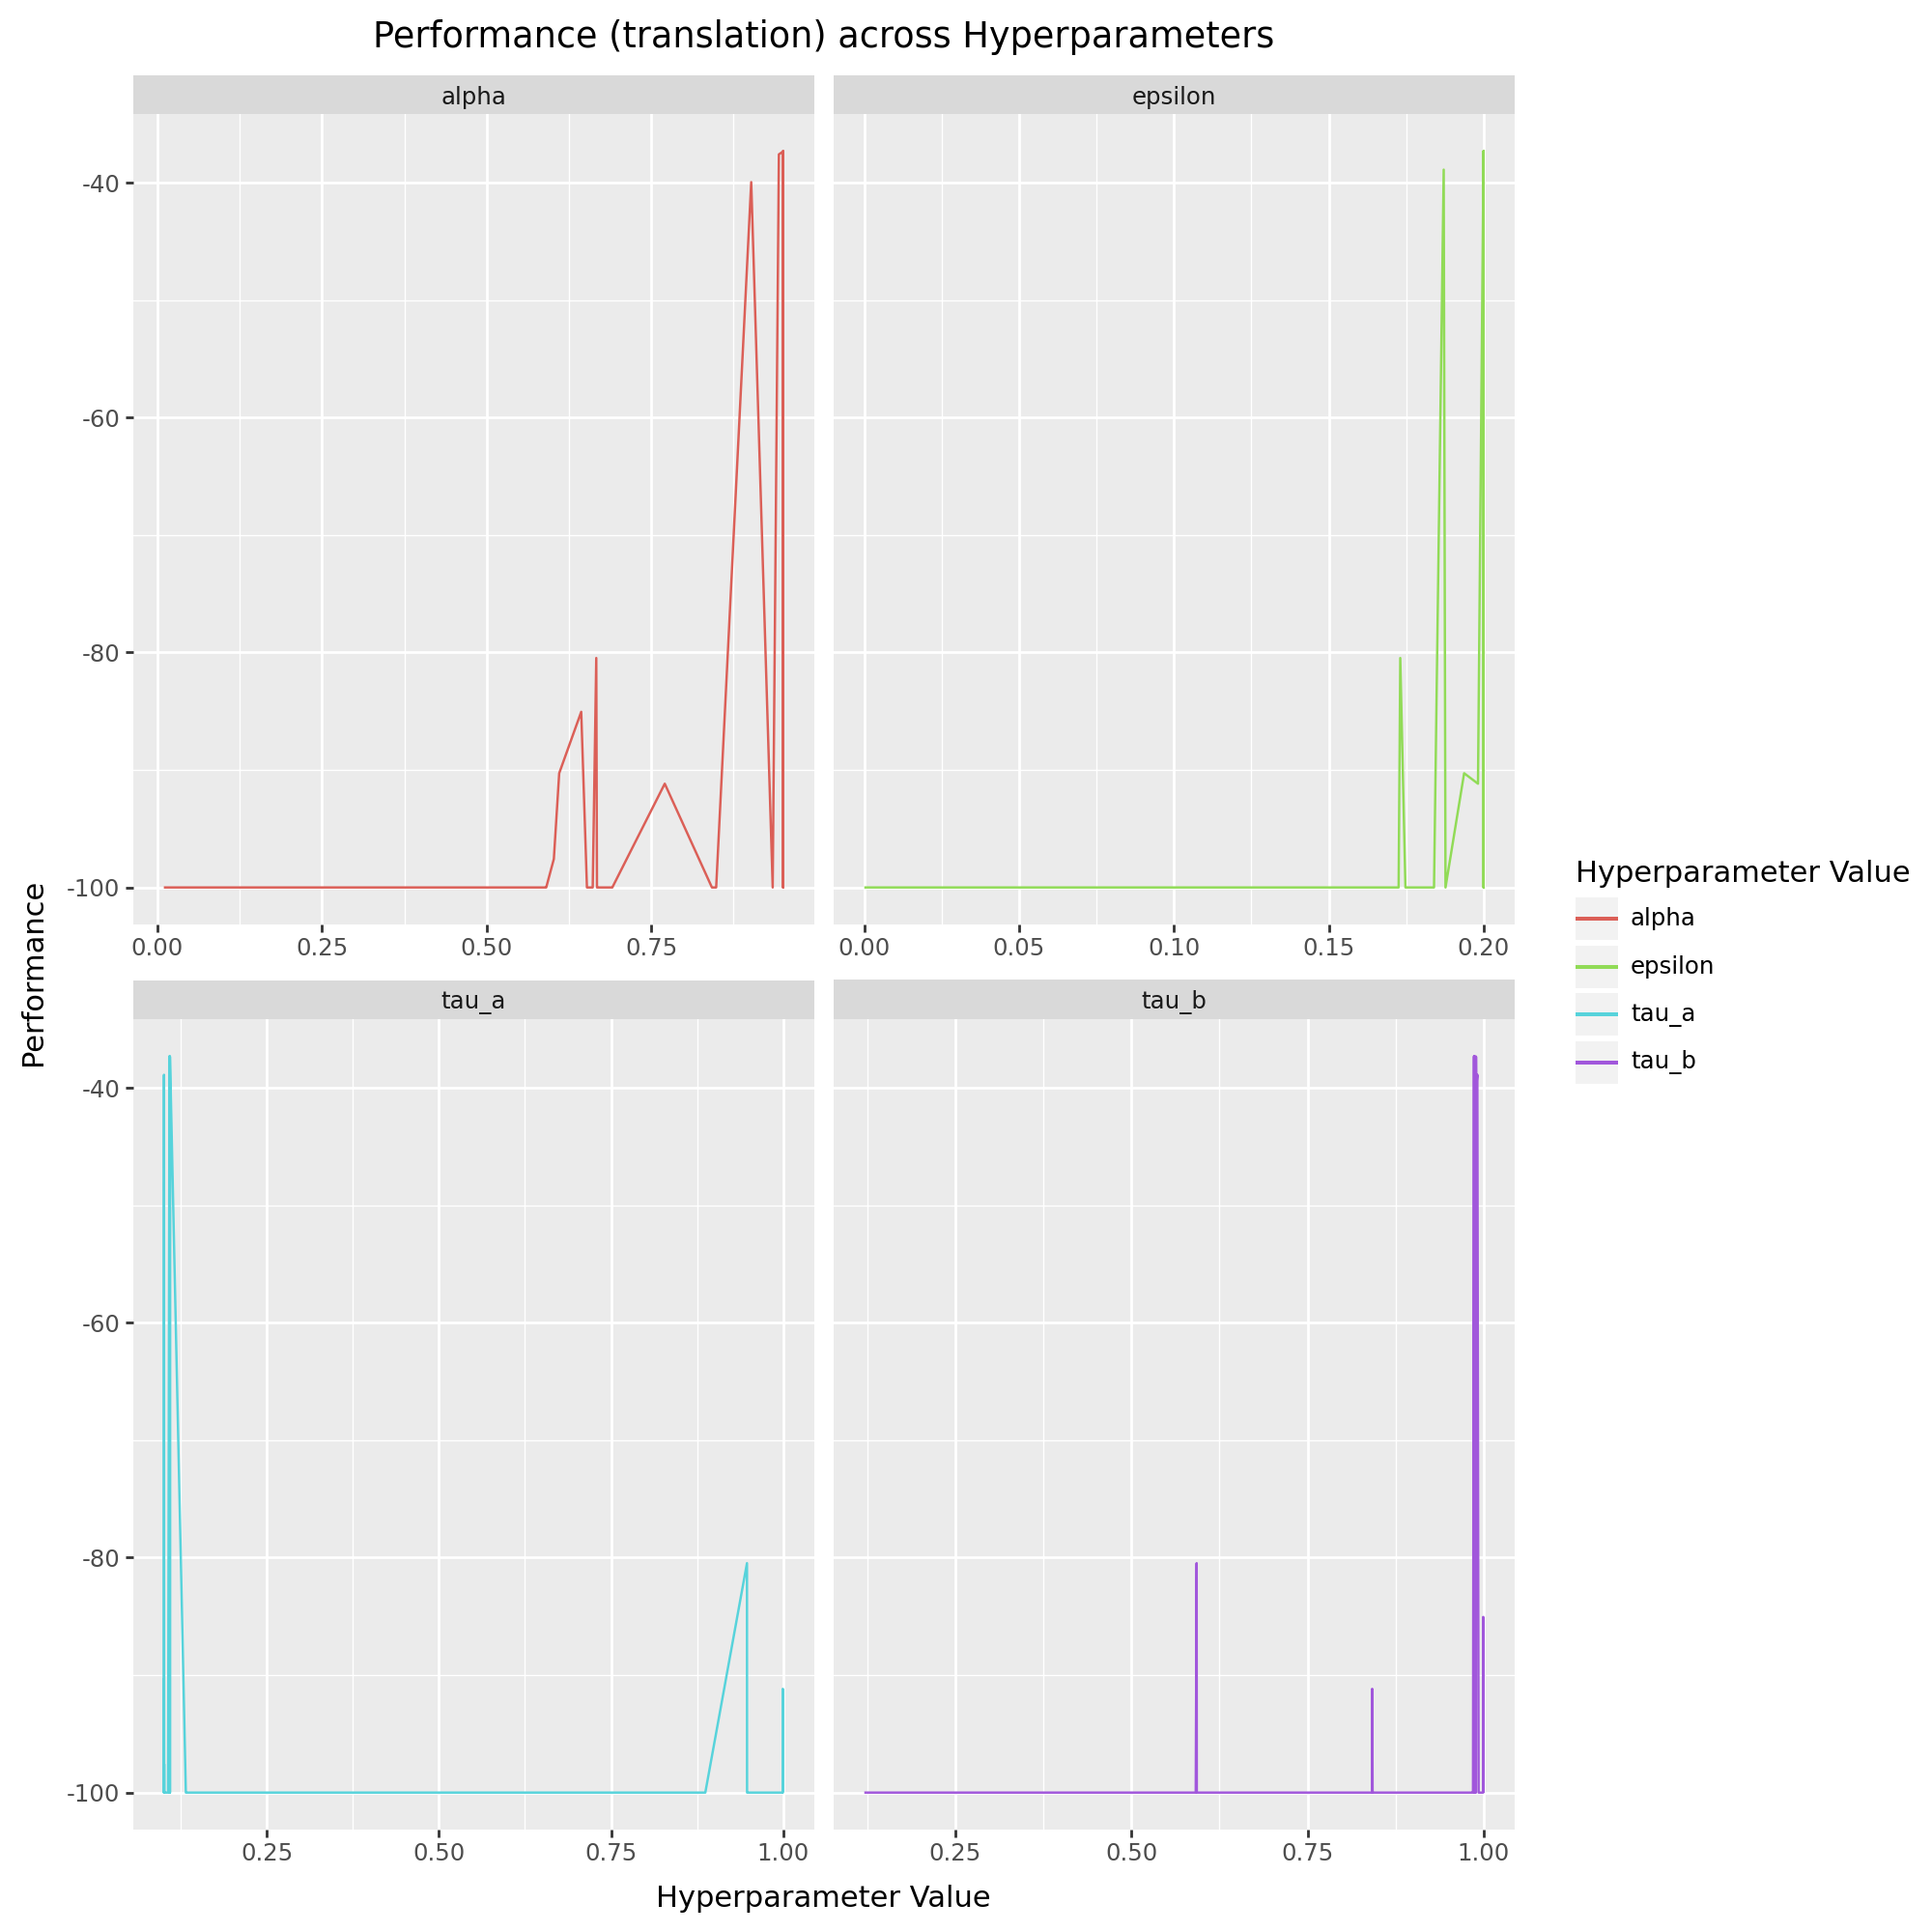

In [41]:
path = "/p/project1/hai_fzj_bda/koenig8/ot/tune_params/imbalanced_problem/param_search.txt"
df4 = pd.read_csv(path)
plot_performances(df4, metric_name = "translation", figsize = (10, 10), threshold = -100)

## Only scaled and extended embeddings

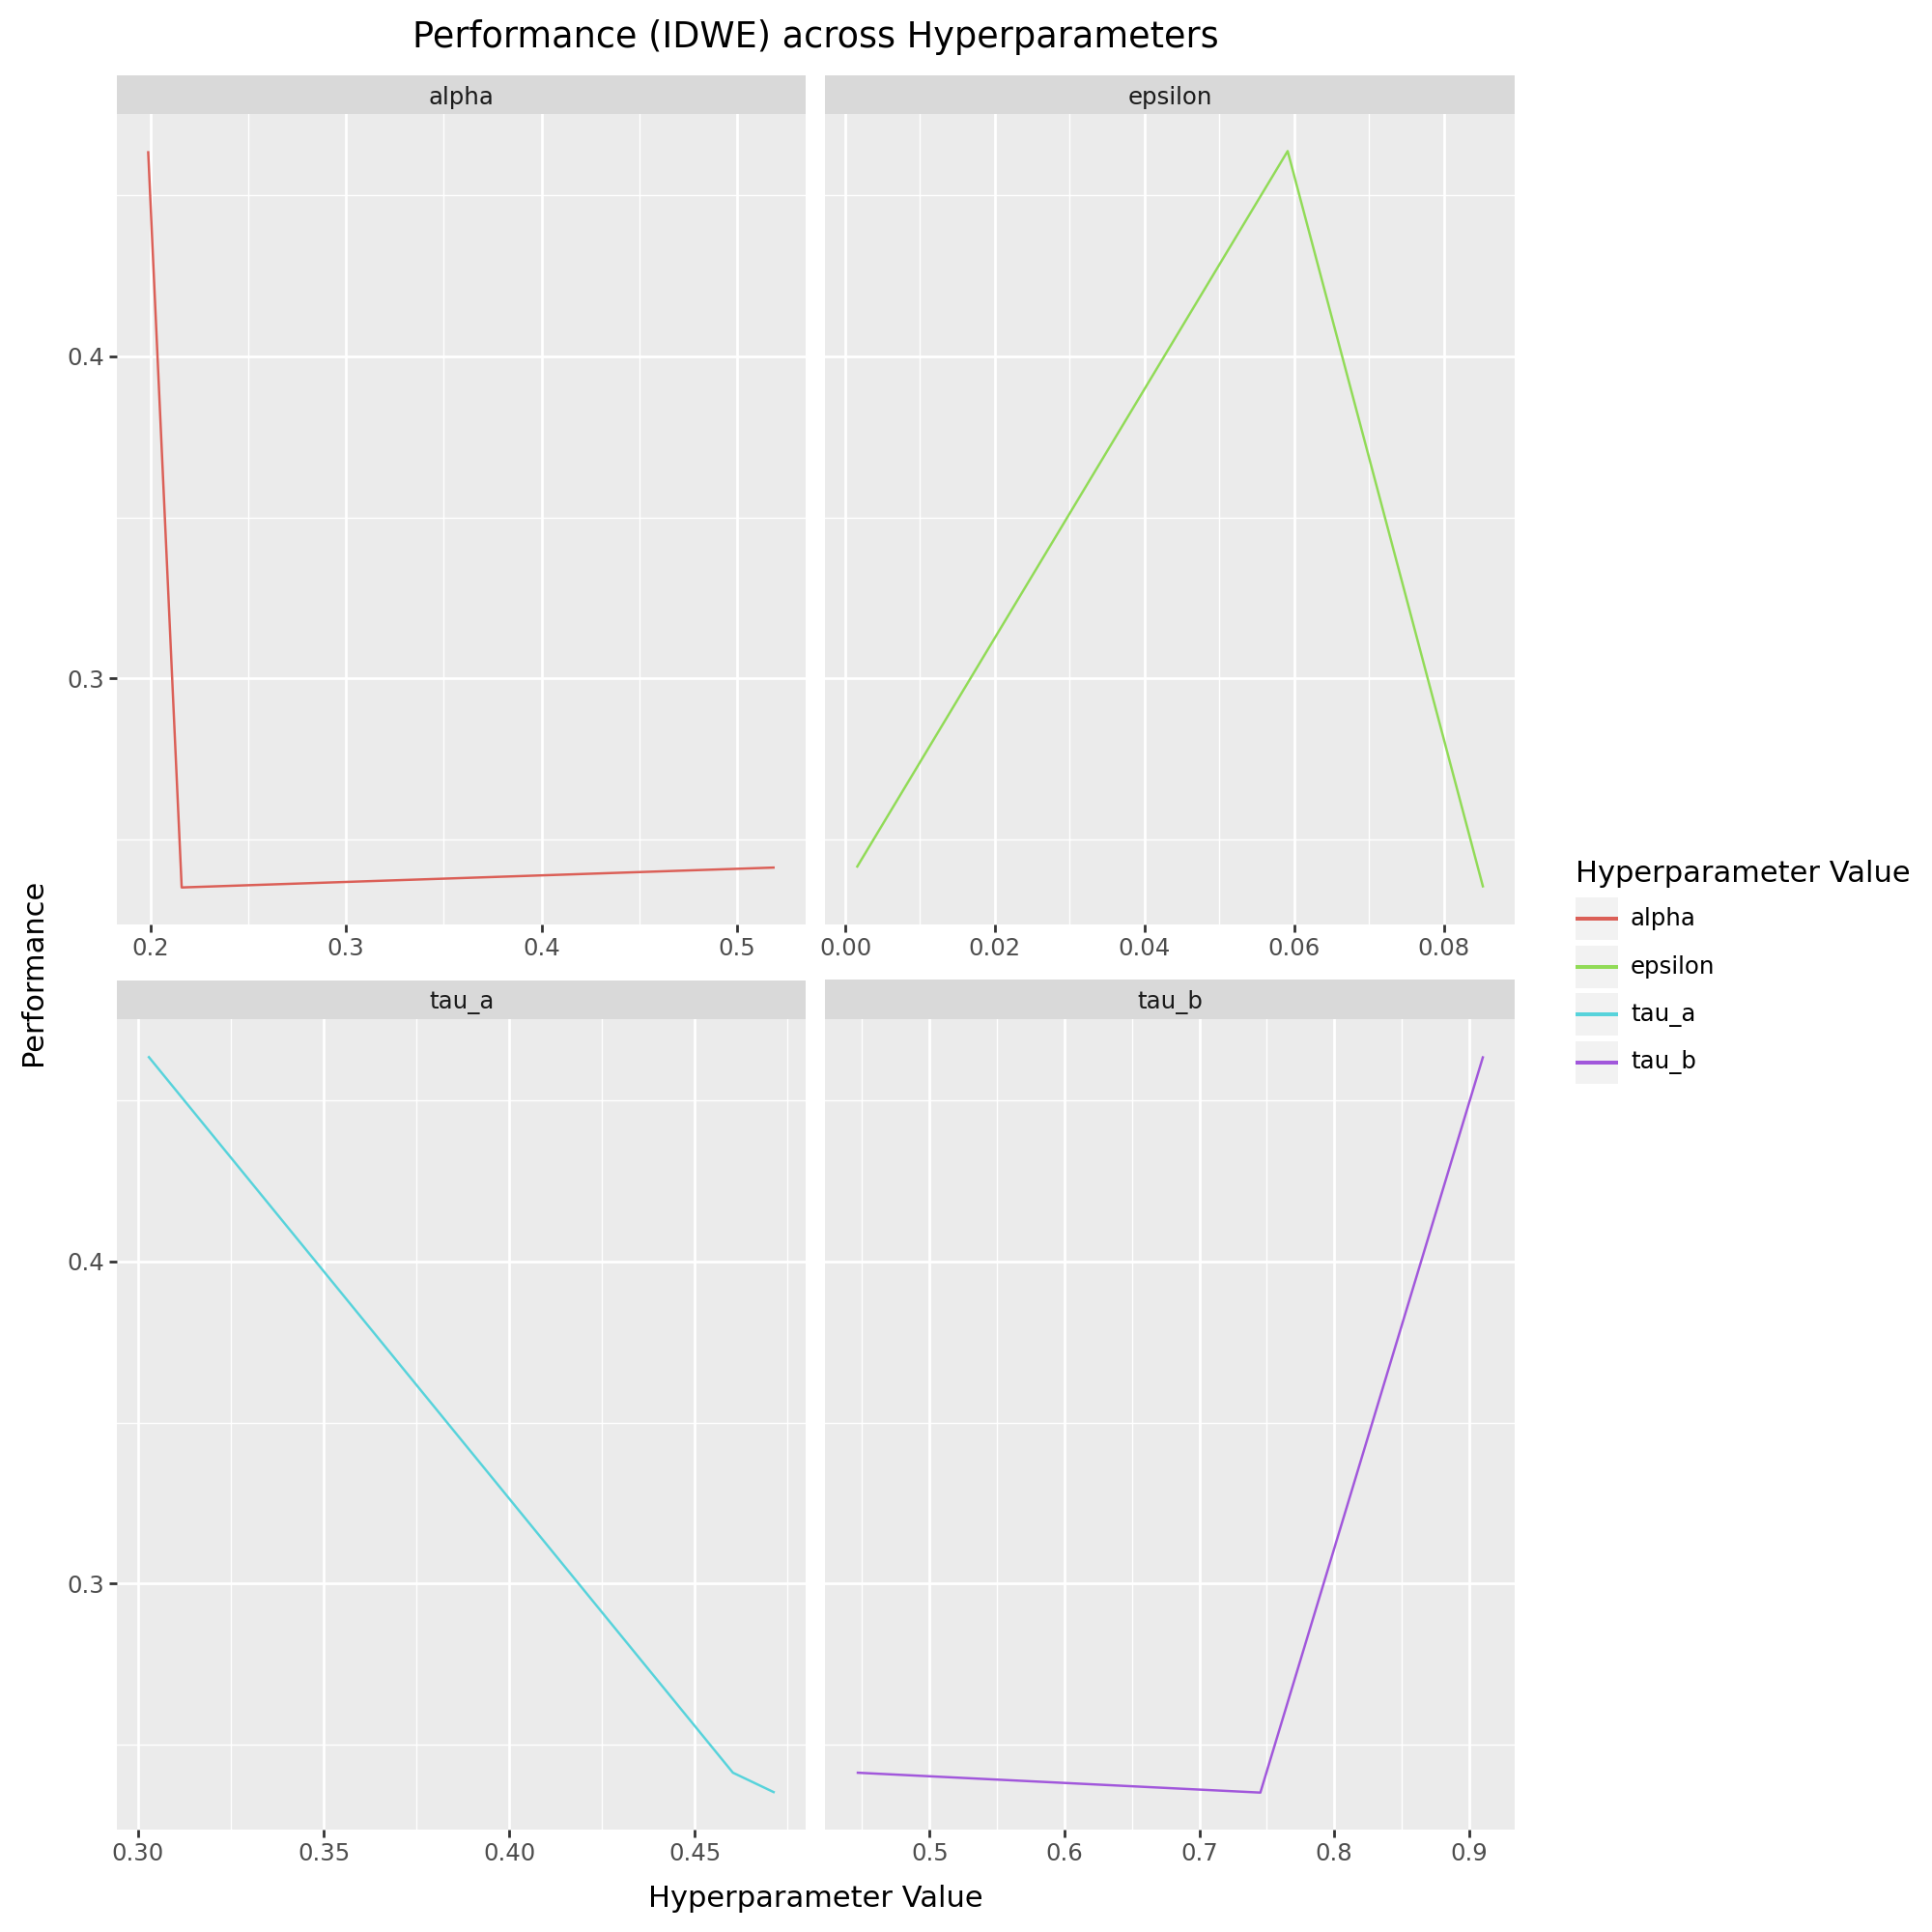

In [5]:
path = "/p/project1/hai_fzj_bda/koenig8/ot/tune_params/only_scaled/param_search.txt"
df5 = pd.read_csv(path).drop(["linear_term", "source_key", "target_key"], axis=1)
plot_performances(df5, metric_name = "IDWE", figsize = (10, 10), threshold = -100)